In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.cluster
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import random

In [29]:
data = pd.read_csv('menu.csv')

In [30]:
print(data['Serving Size'])

0       4.8 oz (136 g)
1       4.8 oz (135 g)
2       3.9 oz (111 g)
3       5.7 oz (161 g)
4       5.7 oz (161 g)
            ...       
255    10.1 oz (285 g)
256    13.4 oz (381 g)
257     6.7 oz (190 g)
258    14.2 oz (403 g)
259     7.1 oz (202 g)
Name: Serving Size, Length: 260, dtype: object


Nie powinny wchodzić w skład wektora cech:
* category (z nimi będziemy porównywać)
* item (nazwy nie da się interpretować)
* serving size (różne jednostki - gramatura, objętość)

In [39]:
data.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [ ]:
data['Serving Size'].describe()

202


In [54]:
data = data.drop(columns=['Category', 'Item', 'Serving Size'])

In [60]:
data_np = data.to_numpy()

In [61]:
print(data_np)

[[300. 120.  13. ...   0.  25.  15.]
 [250.  70.   8. ...   0.  25.   8.]
 [370. 200.  23. ...   0.  25.  10.]
 ...
 [340. 100.  11. ...   0.  25.   6.]
 [810. 290.  32. ...   0.  60.   6.]
 [410. 150.  16. ...   0.  30.   4.]]


In [65]:
corr = np.corrcoef(data_np, rowvar=False)

<AxesSubplot:>

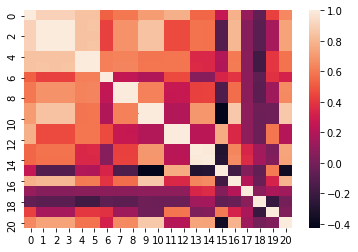

In [66]:
sb.heatmap(corr)

Wycentrowanie nie jest konieczne, jednak ułatwi skalowanie.

In [70]:
data['Calories'].describe()

count     260.000000
mean      368.269231
std       240.269886
min         0.000000
25%       210.000000
50%       340.000000
75%       500.000000
max      1880.000000
Name: Calories, dtype: float64

In [71]:
data['Sugars'].describe()

count    260.000000
mean      29.423077
std       28.679797
min        0.000000
25%        5.750000
50%       17.500000
75%       48.000000
max      128.000000
Name: Sugars, dtype: float64

In [72]:
data['Protein'].describe()

count    260.000000
mean      13.338462
std       11.426146
min        0.000000
25%        4.000000
50%       12.000000
75%       19.000000
max       87.000000
Name: Protein, dtype: float64

In [73]:
data['Trans Fat'].describe()

count    260.000000
mean       0.203846
std        0.429133
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.500000
Name: Trans Fat, dtype: float64

In [79]:
print(data.shape[1])

21


In [82]:
data[0]

KeyError: 0

In [95]:
data_reduced = data.drop(columns=['Total Fat', 'Saturated Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Dietary Fiber'])

In [96]:
data_reduced_np = data_reduced.to_numpy()

<AxesSubplot:>

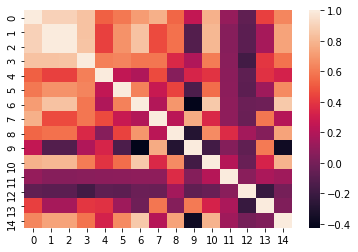

In [97]:
sb.heatmap(np.corrcoef(data_reduced_np, rowvar=False))

array([[1.       , 0.9045878],
       [0.9045878, 1.       ]])

In [102]:
np.corrcoef(data['Total Fat'], data['Calories from Fat'])

array([[1.       , 0.9996635],
       [0.9996635, 1.       ]])

In [105]:
data_reduced.describe()

,Calories,Calories from Fat,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Trans Fat,Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,21.815385,29.965385,0.203846,18.392308,20.676923,15.780769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,21.885199,26.639209,0.429133,29.091653,24.034954,9.419544,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,3.750000,4.750000,0.000000,2.000000,4.750000,10.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,17.000000,24.000000,0.000000,11.000000,8.000000,15.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,35.000000,48.000000,0.000000,21.250000,36.250000,20.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,182.000000,102.000000,2.500000,192.000000,150.000000,47.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [106]:
np.corrcoef(data_reduced['Calories'], data_reduced['Calories from Fat'])

array([[1.       , 0.9045878],
       [0.9045878, 1.       ]])

In [109]:
final_data = data_reduced.drop(columns=['Calories from Fat'])

<AxesSubplot:>

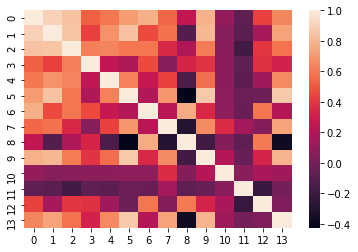

In [110]:
sb.heatmap(np.corrcoef(final_data.to_numpy(), rowvar=False))

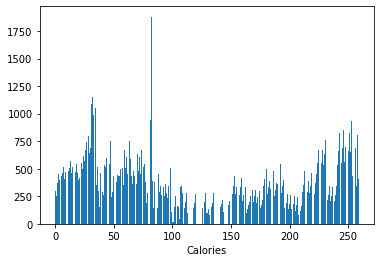

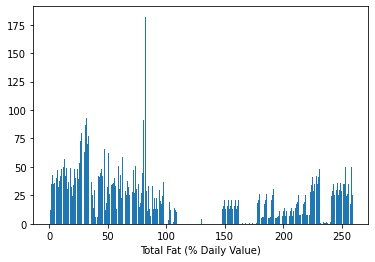

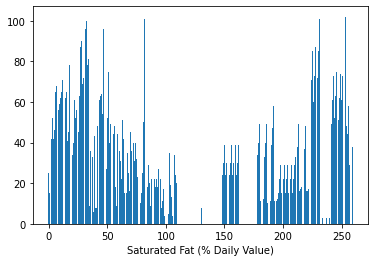

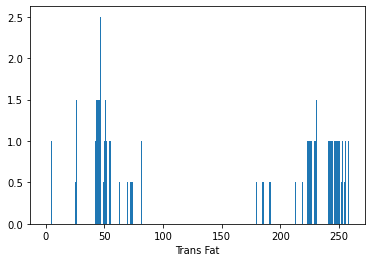

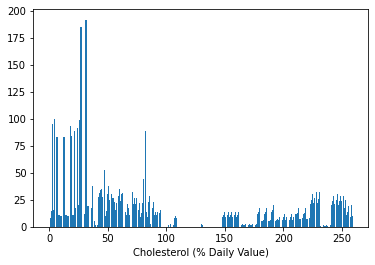

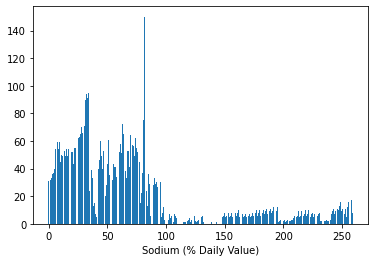

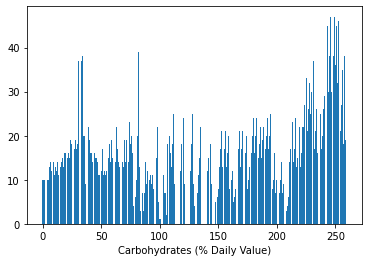

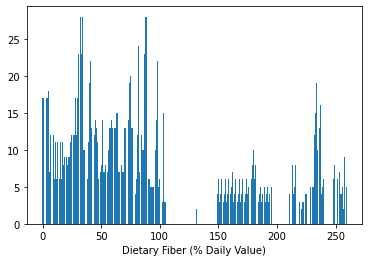

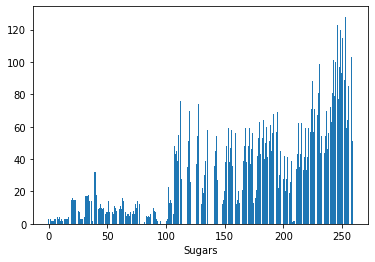

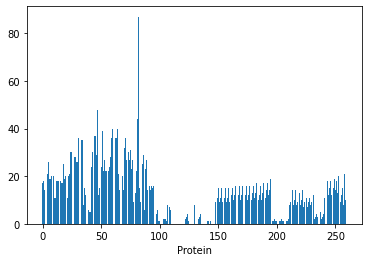

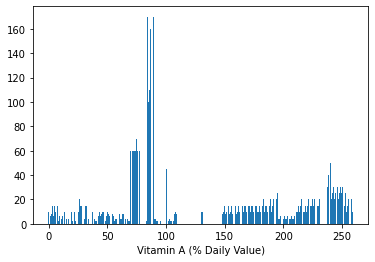

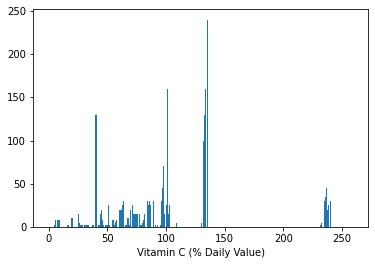

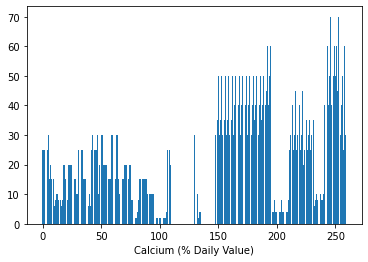

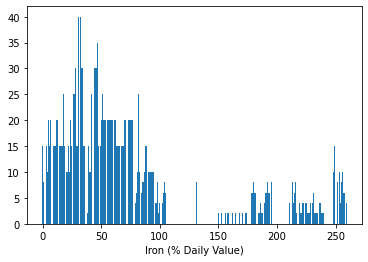

In [111]:
for column in final_data:
    plt.bar(range(final_data.shape[0]), final_data[column])
    plt.xlabel(column)
    plt.show()

P

In [139]:
final_data_np = final_data.to_numpy()

In [187]:
def score_basic_kmeans(data, func, verbose=False, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, init=func, verbose=verbose)
    kmeans.fit(data)
    return davies_bouldin_score(data, kmeans.labels_)

In [188]:
score_basic_kmeans(final_data_np, "k-means++")

ValueError: y should be a 1d array, got an array of shape (5, 14) instead.

In [181]:
score_basic_kmeans(final_data_np, "random")

0.741583411547548

In [182]:
def get_random(X, n_clusters, random_state):
    X = np.array(X)
    res = [random.sample(list(X[:, i]), n_clusters) for i in range(X.shape[1])]
    return np.stack(res, axis=1)

In [183]:
score_basic_kmeans(final_data_np, get_random)

0.6257642173514324

Dane które mają % daily value przeskalować przez 100, Calories, Sugar, Protein - znaleźć dane o dziennym spożyciu i podzielić xD

In [142]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_data_np)

In [186]:
score_basic_kmeans(scaled_data, "random")

1.2727880875687627

In [234]:
NUM_ATTEMPTS = 5
NUM_CLUSTERS = 5
NUM_ITER = 50

def assess_method(data_sample, method):
    scores = []

    for sample in range(NUM_ATTEMPTS):
        print('\nCentroid attempt: ', sample)
        km = KMeans(n_clusters=NUM_CLUSTERS, init=method, max_iter=1, n_init=1)#, verbose=1)
        km.fit(data_sample)
        scores.append([])
        cents = km.cluster_centers_

        for iter in range(NUM_ITER):
            km = KMeans(n_clusters=NUM_CLUSTERS, init=cents, max_iter=1, n_init=1)
            km.fit(data_sample)
            scores[sample].append(davies_bouldin_score(data_sample, km.labels_))
            cents = km.cluster_centers_
    return np.array(scores)

In [235]:
assessment = assess_method(final_data, "random")
print(assessment.shape)


Centroid attempt:  0

Centroid attempt:  1

Centroid attempt:  2

Centroid attempt:  3

Centroid attempt:  4
(5, 50)


In [264]:
def plot_assessment(assessment, xlabel="iteration", ylabel="davies_bouldin_score"):
    assessment = assessment.T
    stds = [np.std(res) for res in assessment]
    means = [np.mean(res) for res in assessment]
    plt.bar(range(assessment.shape[0]), means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=3)
    # plt.xticks(range(assessment.shape[1]))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

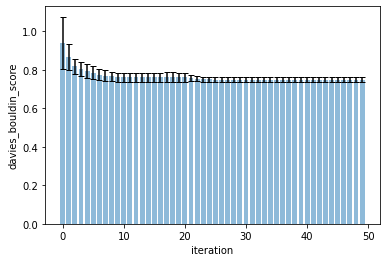

In [265]:
plot_assessment(assessment)

In [256]:
best_method = "random"
def assess_k(data, ns_clusters, repetitions):
    k_scores = []
    for k in range(len(ns_clusters)):
        k_scores.append([])
        for i in range(repetitions):
            kmeans = KMeans(n_clusters=ns_clusters[k], init=best_method)
            kmeans.fit(data)
            k_scores[k].append(davies_bouldin_score(data, kmeans.labels_))
        k_scores[k] = np.array(k_scores[k])
    return np.array(k_scores)

In [266]:
k_range = range(3, 25)
k_assessment = assess_k(final_data, k_range, 5)
print(k_assessment)

[[0.72563915 0.72295101 0.72563915 0.72563915 0.72217683]
 [0.73959068 0.73891377 0.73959068 0.73871356 0.56359074]
 [0.74158341 0.74158341 0.74158341 0.74158341 0.74158341]
 [0.83622303 0.74581917 0.69360866 0.74581917 0.68725074]
 [0.64958636 0.85656182 0.70467301 0.67349873 0.72822381]
 [0.92793007 0.77515331 0.82838225 0.81448823 0.78521344]
 [0.85738557 0.85376477 0.83765994 0.8588889  0.8606677 ]
 [0.84614949 0.87050949 0.89603738 0.84614949 0.99373322]
 [0.88445996 0.93984763 0.82045307 0.77983886 0.88103983]
 [0.73620223 0.88803687 0.94365036 0.75796525 0.91674282]
 [0.96586731 0.97418791 0.98485539 0.92424556 0.77622478]
 [0.94746184 0.9129609  1.04998649 0.91224141 0.85174119]
 [0.92593172 0.87194236 0.95881116 0.92742994 0.84493357]
 [0.95231462 0.78370422 0.93147681 0.86709948 0.94311244]
 [0.89709921 0.8332177  0.97692171 0.84999591 0.94842815]
 [0.87962739 0.98523476 0.83106693 1.0707065  0.99938416]
 [0.94770847 0.9814615  0.97180442 0.9600928  0.882338  ]
 [0.87811775 0

In [270]:
def plot_k_assessment(assessment, k_range):
    stds = [np.std(res) for res in assessment]
    means = [np.mean(res) for res in assessment]
    plt.bar(k_range, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=3)
    plt.xticks(k_range)
    plt.xlabel("k")
    plt.ylabel("davies_bouldin_score")
    plt.show()

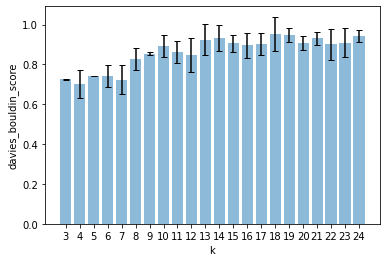

In [271]:
plot_k_assessment(k_assessment, k_range)


